In [1]:
import numpy as np
import pandas as pd
import glob
import os
import seaborn as sns

In [2]:
def get_whole_dataset(path):
    all_filenames = [i for i in glob.glob(os.path.join(path, "*.csv"))]
    df_from_each_file = [pd.read_csv(f) for f in all_filenames]
    return pd.concat(df_from_each_file, axis=0, ignore_index = True)

In [3]:
df = get_whole_dataset('.')
df.head()

,title,id,subreddit,body,class
0,hhhhhhh,l9snx9,i.redd.it,NaN,non-depressed
1,I am practicing balloon art and this is my fir...,l9saww,i.redd.it,[deleted],non-depressed
2,i’ve never been allowed to buy my own clothes ...,l9qzk1,i.redd.it,NaN,non-depressed
3,I launched gourmet cupcakes on my website toda...,l9qdfl,i.redd.it,[deleted],non-depressed
4,"Sometimes life knocks you down, people down on...",l9q1ls,i.redd.it,NaN,non-depressed


In [4]:
df.shape

(1584890, 5)

In [5]:
df_2 = df[df['body'].str.len() <= 200]
df_2.shape

(426792, 5)

In [6]:
from numpy import NaN


#df_3 = df_2.drop(df_2[(df_2['body'].str == '\[removed\]') | (df_2['body'] == NaN) | (df_2['body'].str == '\[deleted\]')].index)
df_3 = df_2.drop(df_2[(df_2['body'].str.contains('\[removed\]') == True) | (df_2['body'].str.contains('\[deleted\]') == True)].index)
df_3 = df_3.drop(df_2[df_2['body'] == NaN].index)
print(df_3)

                                                     title      id  \
9        Forehead kisses from my girlfriend is the best...  l9mb7z   
75       Made a new friend on reddit last month, and it...  l7ley8   
76             [OC] I make webcomics to make people happy!  l7h2b8   
79       I had to do a short presentation to my company...  l7gy2j   
108      After this video I will not look at life the s...  l6ecsm   
...                                                    ...     ...   
1584857                           I feel like I'm an idiot  mhn7ip   
1584870                                            Been up  mhmut1   
1584878  I second guess and ruin everything that could ...  mhmjll   
1584879  I’ve heard that people use hostages to commit ...  mhmjfm   
1584886                  What is there to look forward to?  mhmbvv   

               subreddit                                               body  \
9             self.happy         Hope y'all get to enjoy this from someone.   
7

In [7]:
'''df_2 = pd.DataFrame({'subreddit':['happy', 'depressed'], 'Count':[len(df_2.loc[df['subreddit'] == 'self.happy']),len(df_2.loc[df['subreddit'] == 'self.depression'])]})
ax = df_2.plot.bar(x='subreddit', y='Count',rot=0)'''

"df_2 = pd.DataFrame({'subreddit':['happy', 'depressed'], 'Count':[len(df_2.loc[df['subreddit'] == 'self.happy']),len(df_2.loc[df['subreddit'] == 'self.depression'])]})\nax = df_2.plot.bar(x='subreddit', y='Count',rot=0)"

/home/carolps/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

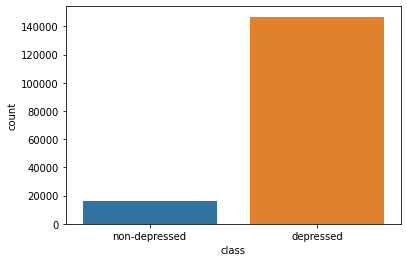

In [8]:
sns.countplot(df_3['class'])

In [9]:
df_3["class"].value_counts().to_frame()

,class
depressed,146812
non-depressed,16510


In [10]:
exceded = df_3[df_3['class'] == 'depressed'].sample(65151)
data = df_3[~df_3.index.isin(exceded.index)]
data["class"].value_counts().to_frame()

,class
depressed,81661
non-depressed,16510


In [11]:
data.to_csv('dataset-final.csv', index=False)